In [35]:
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pipeline_v200
reload(pipeline_v200)
import helper_functions
import qutip
import pandas as pd

sns.set_palette("Set2")
# sns.color_palette("Set2")

In [36]:
n = 5 ## numero finale di qubit
N = 10 ## numero di qubit prima della traccia parziale

a_x= 1
h_z = 1.5 #hardcoded

delta = 0.5
derivative_delta = 1e-5

m_s = range(1, 32)

DEBUG=True

initial_state = helper_functions.random_mixed_density_matrix(N, n)

y_s = np.array([pipeline_v200.simulation(
                        N=N,
                        n=n,
                        initial_state= initial_state,
                        DEBUG=True,
                        derivative_delta=derivative_delta,
                        a_x= a_x, 
                        h_z= h_z, ## variable
                        delta = delta,
                        m = m) for m in m_s])

Generating random mixed density matrix
purity of initial state = (0.06383701705459567+1.7787691892340307e-19j) 
Dimension of the Hilbert space: 32
Initial state type: <class 'numpy.ndarray'> | initial_state: [[ 0.03319696+1.21644438e-19j  0.00562115-2.61765242e-03j
   0.00137545-6.29835135e-03j ... -0.0028627 -2.22077575e-03j
   0.00141358-5.51092915e-03j -0.00019282+1.85712515e-03j]
 [ 0.00562115+2.61765242e-03j  0.02779247+4.79909859e-20j
   0.00090625+2.28578514e-03j ... -0.00054805+5.76836822e-03j
  -0.0026388 +1.49039525e-03j -0.00028353-5.56483580e-03j]
 [ 0.00137545+6.29835135e-03j  0.00090625-2.28578514e-03j
   0.02540376-6.68941513e-20j ... -0.00430136-3.28051220e-03j
  -0.00371407-5.21000958e-03j -0.00280112-1.26758120e-03j]
 ...
 [-0.0028627 +2.22077575e-03j -0.00054805-5.76836822e-03j
  -0.00430136+3.28051220e-03j ...  0.02464891-1.60304615e-19j
   0.00312781-2.05003818e-03j  0.00192782-1.44082469e-03j]
 [ 0.00141358+5.51092915e-03j -0.0026388 -1.49039525e-03j
  -0.00371407

In [37]:
y_s[0]

{'fidelity_truncated': 0.05982735626480901,
 'fidelity_truncated_generalized': (0.9479787878150862-2.3057142834209004e-19j),
 'fidelity_true': 0.84181817847109768546,
 'lower_tqfi': (1.664678789917243+7.378285706946881e-18j),
 'upper_tqfi': 30.08552459952611,
 'qfi_fidelity': 5.0618182889248740652,
 'sub_qfi_bound': 0.14321310394871034,
 'super_qfi_bound': (30.08552458242308-7.08430863897571e-09j),
 'H_delta': (1.664678789917243+7.378285706946881e-18j),
 'J_delta': (30.08552458242308-7.08430863897571e-09j),
 'trace_rho': (0.9999999999999999-2.1141942363467336e-18j),
 'trace_rho_delta': (1.0000000000000002+9.175060884658581e-18j),
 'purity_rho': (0.06383701705459571-2.202285662861181e-19j),
 'purity_rho_delta': (0.06383701705459571+4.06152298208437e-19j),
 'rank_rho': 32,
 'rank_rho_delta': 32,
 'truncated_eigenvalues': array([0.11184857]),
 'eigenvalues': array([1.11848568e-01, 1.00934746e-01, 9.44308750e-02, 7.85417501e-02,
        7.29733901e-02, 6.36095991e-02, 5.69000179e-02, 5.373

In [38]:

# Assuming y_s is your list of dictionaries
data = []
for i, item in enumerate(y_s):
    data.append({
        "m": i,
        "fidelity_truncated": item["fidelity_truncated"],
        "fidelity_true": item["fidelity_true"],
        "fidelity_truncated_generalized": item["fidelity_truncated_generalized"]
    })

df = pd.DataFrame(data)
df

,m,fidelity_truncated,fidelity_true,fidelity_truncated_generalized
0,0,0.059827,0.841818,0.947979-0.000000j
1,1,0.129258,0.841818,0.916475-0.000000j
2,2,0.176015,0.841818,0.868801+0.000000j
3,3,0.236791,0.841818,0.851035+0.000000j
4,4,0.298656,0.841818,0.839927+0.000000j
5,5,0.350917,0.841818,0.828578+0.000000j
6,6,0.401556,0.841818,0.822317+0.000000j
7,7,0.443400,0.841818,0.810427+0.000000j
8,8,0.480442,0.841818,0.798962+0.000000j
9,9,0.516272,0.841818,0.793148+0.000000j


/home/ronin/miniforge3/envs/space/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/ronin/miniforge3/envs/space/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


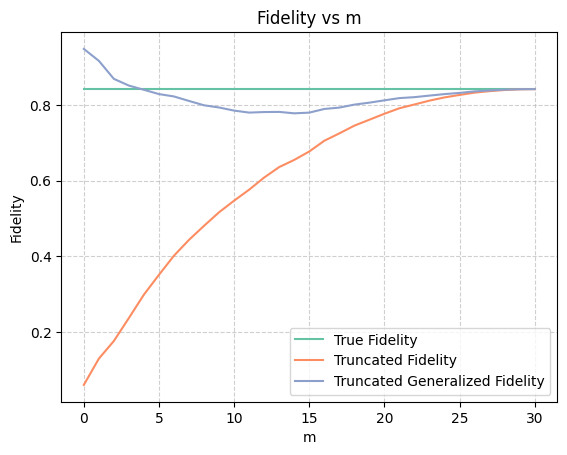

In [39]:
plt.plot(df["m"], df["fidelity_true"], label="True Fidelity")
plt.plot(df["m"], df["fidelity_truncated"], label="Truncated Fidelity")
plt.plot(df["m"], df["fidelity_truncated_generalized"], label="Truncated Generalized Fidelity")

plt.xlabel("m")
plt.ylabel("Fidelity")
plt.title("Fidelity vs m")
plt.legend()

plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability
plt.show()
